In [1]:
import pandas as pd
import numpy as np

In [39]:
%store -r cpi_df

In [40]:
cpi_df

,Date,CPI,Mo Change
0,1913-01-01,9.800,NaN
1,1913-02-01,9.800,0.000000
2,1913-03-01,9.800,0.000000
3,1913-04-01,9.800,0.000000
4,1913-05-01,9.700,-0.010204
...,...,...,...
1296,2021-01-01,261.582,0.004254
1297,2021-02-01,263.014,0.005474
1298,2021-03-01,264.877,0.007083
1299,2021-04-01,267.054,0.008219


In [41]:
# Cutting CPI df down to dates where gold/BTC/SP info exists
cpi_df = cpi_df[cpi_df['Date'] > '1980-01-01']

In [42]:
# Creating column to calculate monthly % change in CPI
cpi_df['Mo Change'] = cpi_df['CPI'].pct_change()

<ipython-input-42-0aca62c72ed6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpi_df['Mo Change'] = cpi_df['CPI'].pct_change()


<AxesSubplot:xlabel='Date'>

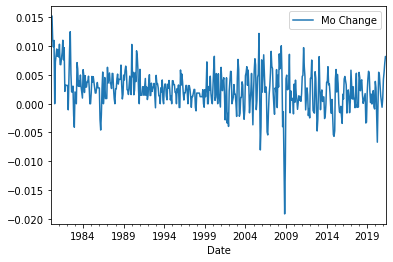

In [43]:
# Plotting line graph of CPI monthly change
cpi_df.plot(x = 'Date', y = 'Mo Change')

<AxesSubplot:xlabel='Date', ylabel='CPI'>

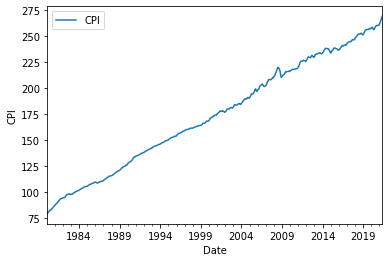

In [132]:
# Plotting line graph of CPI
cpi_df.plot(x = 'Date', y = 'CPI', ylabel = 'CPI')

In [45]:
%store -r btc_df
%store -r gold_usd_df
%store -r sp500_df

In [46]:
# Merging in BTC data
cpi_df = pd.merge(cpi_df, btc_df, how = 'left', on = 'Date')

In [47]:
# Merging in Gold data
cpi_df = pd.merge(cpi_df, gold_usd_df, how = 'left', on = 'Date')

In [48]:
# Merging in S&P 500 data
cpi_df = pd.merge(cpi_df, sp500_df, how = 'left', on = 'Date')

In [49]:
# Creating column to calculate monthly % change in BTC
cpi_df['BTC Mo Change'] = cpi_df['BTC/USD'].pct_change()

In [50]:
# Creating column to calculate monthly % change in Gold
cpi_df['Gold Mo Change'] = cpi_df['Oz Gold/USD'].pct_change()

In [51]:
# Creating column to calculate monthly % change in S&P 500
cpi_df['SP 500 Mo Change'] = cpi_df['SP500'].pct_change()

array([[<AxesSubplot:title={'center':'Mo Change'}>]], dtype=object)

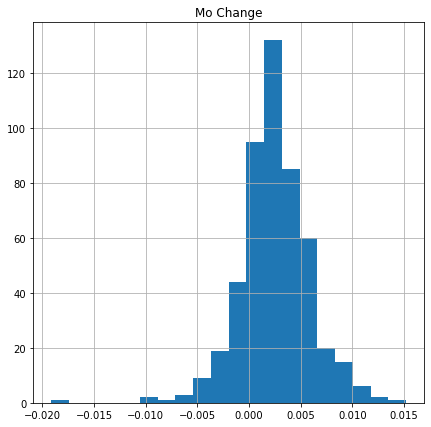

In [135]:
# Creating histogram of CPI monthly change
cpi_df.hist(column = 'Mo Change', figsize = (7,7), bins = 20, title = 'CPI Monthly Change')

In [84]:
# Finding standard dev of CPI monthly change
cpi_mo_std = cpi_df['Mo Change'].std()

In [85]:
# Finding mean of CPI monthly change
cpi_mo_mean = cpi_df['Mo Change'].mean()

In [55]:
# Creating variable to categorize high change in monthly CPI change (2 standard dev above mean)
cpi_mo_high = cpi_mo_mean + 2*cpi_mo_std

In [56]:
# Creating variable to categorize low change in monthly CPI change (2 standard dev below mean)
cpi_mo_low = cpi_mo_mean - 2*cpi_mo_std

In [57]:
def cpi_cat(cpi_change):
    """
    This function categorizes monthly CPI changes.
    A 'High' monthly change is any change 2 standard deviations above the mean.
    A 'Low' monthly change is any change 2 standard deviations below the mean.
    Anything else is 'Normal'
    
    Inputs:
    Monthly CPI change
    
    Outputs:
    Categorical variables to describe monthly change in CPI ('High', 'Normal', and 'Low')
    """
    if cpi_change > cpi_mo_high:
        return 'High'
    elif cpi_change < cpi_mo_low:
        return 'Low'
    else:
        return 'Normal'

In [58]:
# Creating categorical columns to describe monthly CPI change 
cpi_df['CPI Change Cat'] = cpi_df['Mo Change'].apply(cpi_cat)

In [150]:
# Finding count of each categorical column for monthly CPI change
cpi_df.groupby('CPI Change Cat').count().drop(columns = ['CPI','BTC/USD','Oz Gold/USD', 'SP500', 'Date'])

,Mo Change,BTC Mo Change,Gold Mo Change,SP 500 Mo Change,CPI Change Cat 2
CPI Change Cat,,,,,
High,15,0,15,0,15
Low,12,4,12,5,12
Normal,468,92,468,112,469


In [60]:
cpi_df

,Date,CPI,Mo Change,BTC/USD,Oz Gold/USD,SP500,BTC Mo Change,Gold Mo Change,SP 500 Mo Change,CPI Change Cat
0,1980-02-01,78.900,NaN,NaN,676.5,NaN,NaN,NaN,NaN,Normal
1,1980-03-01,80.100,0.015209,NaN,NaN,NaN,NaN,0.000000,NaN,High
2,1980-04-01,81.000,0.011236,NaN,509.5,NaN,NaN,-0.246859,NaN,High
3,1980-05-01,81.800,0.009877,NaN,490.0,NaN,NaN,-0.038273,NaN,High
4,1980-06-01,82.700,0.011002,NaN,NaN,NaN,NaN,0.000000,NaN,High
...,...,...,...,...,...,...,...,...,...,...
491,2021-01-01,261.582,0.004254,29374.151889,NaN,NaN,0.562206,0.000000,0.000000,Normal
492,2021-02-01,263.014,0.005474,33537.176820,NaN,3773.86,0.141724,0.000000,0.030420,Normal
493,2021-03-01,264.877,0.007083,49631.241371,NaN,3901.82,0.479887,0.000000,0.033907,Normal
494,2021-04-01,267.054,0.008219,59095.807978,NaN,4019.87,0.190698,0.000000,0.030255,Normal


In [145]:
# Finding mean of columns grouping by CPI Change Cat column
cpi_df.groupby('CPI Change Cat').agg('mean').drop(columns = ['CPI','BTC/USD','Oz Gold/USD', 'SP500'])

,Mo Change,BTC Mo Change,Gold Mo Change,SP 500 Mo Change
CPI Change Cat,,,,
High,0.010780,NaN,-0.024942,NaN
Low,-0.007477,-0.096601,-0.002759,-0.030208
Normal,0.002478,0.123219,0.004327,0.012402


In [63]:
from scipy.stats import ttest_ind

<AxesSubplot:title={'center':'Gold Mo Change'}, xlabel='CPI Change Cat'>

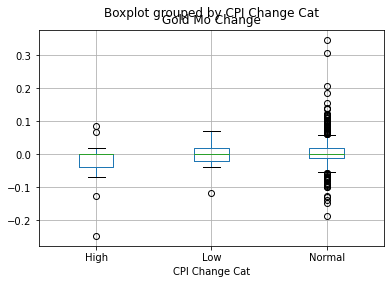

In [137]:
# Creating boxplot of monthly change in gold based on CPI Change Cat column
cpi_df.boxplot(column = 'Gold Mo Change', by = 'CPI Change Cat')

array([[<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Normal'}>, <AxesSubplot:>]],
      dtype=object)

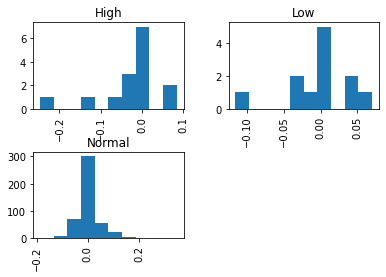

In [139]:
# Creating histograms of monthly change in gold based on CPI Change Cat column
cpi_df.hist(column = 'Gold Mo Change', by = 'CPI Change Cat')

In [65]:
# Creating series for different sets of monthly change in gold price based on CPI Change Cat
high_cpi_mo_gold_change = cpi_df[cpi_df['CPI Change Cat'] == 'High']['Gold Mo Change'].dropna()
normal_cpi_mo_gold_change = cpi_df[cpi_df['CPI Change Cat'] == 'Normabl']['Gold Mo Change'].dropna()
low_cpi_mo_gold_change = cpi_df[cpi_df['CPI Change Cat'] == 'Low']['Gold Mo Change'].dropna()

In [86]:
from scipy.stats import mannwhitneyu

In [87]:
# Man Whit U hypothesis test for gold monthly change with high and normal cpi change datasets
mannwhitneyu(high_cpi_mo_gold_change, normal_cpi_mo_gold_change)

MannwhitneyuResult(statistic=2806.5, pvalue=0.09028237584878052)

In [88]:
# Man Whit U hypothesis test for gold monthly change with high and low cpi change datasets
mannwhitneyu(high_cpi_mo_gold_change, low_cpi_mo_gold_change)

MannwhitneyuResult(statistic=74.0, pvalue=0.22048176328222557)

In [89]:
# Man Whit U hypothesis test for gold monthly change with normal and low cpi change datasets
mannwhitneyu(normal_cpi_mo_gold_change, low_cpi_mo_gold_change)

MannwhitneyuResult(statistic=2791.0, pvalue=0.4859418775305818)

<AxesSubplot:title={'center':'BTC Mo Change'}, xlabel='CPI Change Cat'>

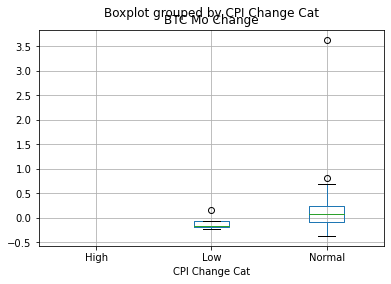

In [69]:
# Creating boxplot of monthly change in BTC based on CPI Change Cat column
cpi_df.boxplot(column = 'BTC Mo Change', by = 'CPI Change Cat')

array([[<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Normal'}>, <AxesSubplot:>]],
      dtype=object)

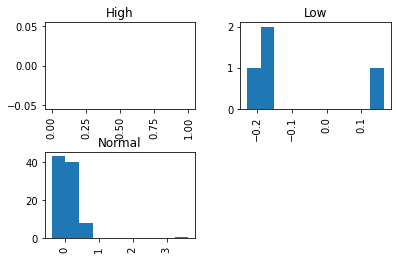

In [70]:
# Creating histogram of monthly change in BTC based on CPI Change Cat column
cpi_df.hist(column = 'BTC Mo Change', by = 'CPI Change Cat')

In [79]:
# Creating series for different sets of monthly change in BTC price based on CPI Change Cat
high_cpi_mo_btc_change = cpi_df[cpi_df['CPI Change Cat'] == 'High']['BTC Mo Change'].dropna()
normal_cpi_mo_btc_change = cpi_df[cpi_df['CPI Change Cat'] == 'Normal']['BTC Mo Change'].dropna()
low_cpi_mo_btc_change = cpi_df[cpi_df['CPI Change Cat'] == 'Low']['BTC Mo Change'].dropna()

In [93]:
# Man Whit U hypothesis test for BTC monthly change with low and normal cpi change datasets
mannwhitneyu(normal_cpi_mo_btc_change, low_cpi_mo_btc_change)

MannwhitneyuResult(statistic=91.0, pvalue=0.04494414871967781)

<AxesSubplot:title={'center':'SP 500 Mo Change'}, xlabel='CPI Change Cat'>

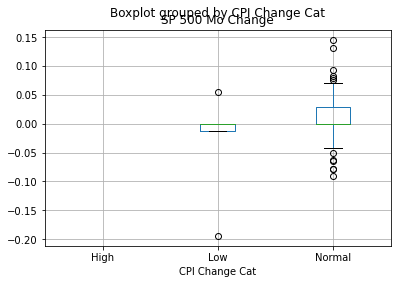

In [75]:
# Creating boxplot of monthly change in S&P 500 based on CPI Change Cat column
cpi_df.boxplot(column = 'SP 500 Mo Change', by = 'CPI Change Cat')

array([[<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Normal'}>, <AxesSubplot:>]],
      dtype=object)

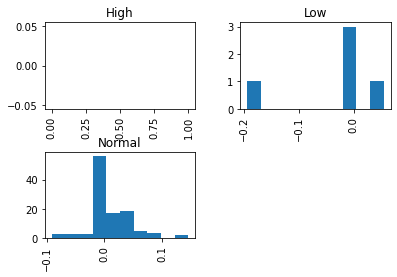

In [76]:
# Creating histograms of monthly change in S&P 500 based on CPI Change Cat column
cpi_df.hist(column = 'SP 500 Mo Change', by = 'CPI Change Cat')

In [78]:
# Creating series for different sets of monthly change in S&P 500 price based on CPI Change Cat
high_cpi_mo_sp_change = cpi_df[cpi_df['CPI Change Cat'] == 'High']['SP 500 Mo Change'].dropna()
normal_cpi_mo_sp_change = cpi_df[cpi_df['CPI Change Cat'] == 'Normal']['SP 500 Mo Change'].dropna()
low_cpi_mo_sp_change = cpi_df[cpi_df['CPI Change Cat'] == 'Low']['SP 500 Mo Change'].dropna()

In [96]:
# Man Whit U hypothesis test for S&P 500 monthly change with low and normal cpi change datasets
mannwhitneyu(normal_cpi_mo_sp_change, low_cpi_mo_sp_change)

MannwhitneyuResult(statistic=188.0, pvalue=0.10254508579766147)

In [185]:
# Creating dictionary with various p-values from above analysis of Gold, BTC and S&P 500 monthly changes
mw_u_cpi = {'Gold pvalues':[0.09028, 0.22048, 0.48594], 'BTC pvalues':[np.nan, np.nan, 0.04494], \
                 'SP500 pvalues':[np.nan, np.nan, 0.10254]}

In [186]:
mw_u_cpi_df = pd.DataFrame.from_dict(mw_u_cpi, orient='index', columns = ['High/Normal', 'High/Low', 'Normal/Low'])

In [187]:
mw_u_cpi_df

,High/Normal,High/Low,Normal/Low
Gold pvalues,0.09028,0.22048,0.48594
BTC pvalues,NaN,NaN,0.04494
SP500 pvalues,NaN,NaN,0.10254


<AxesSubplot:title={'center':'P-Values for Gold, and S&P 500 Monthly Changes for various CPI Change Cats'}>

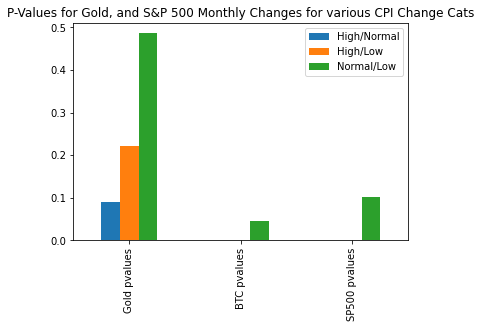

In [189]:
# Creating bar chart for various p-values from above analysis of Gold, BTC and S&P 500 monthly changes
mw_u_cpi_df.plot.bar(title = 'P-Values for Gold, and S&P 500 Monthly Changes for various CPI Change Cats')